Matriz:
            Rafael           Joao             Bia         Giovana  \
0          @neymar        @neymar        @Beyonce       @ProfCaio   
1     @LuanSantana   @LuanSantana      @DorivalJr    @ProfDouglas   
2        @Pericles      @Pericles         @FDiniz   @profHenrique   
3        @ProfCaio      @ProfCaio            @Cr7         @Unimar   
4     @ProfDouglas   @ProfDouglas          @Messi          @Unesp   
5    @profHenrique  @profHenrique    @LebronJames         @Anitta   
6          @Unimar        @Unimar  @PaulMcCartney         @Rihana   
7           @Unesp         @Unesp     @profRafael        @Beyonce   
8          @Anitta        @Anitta             NaN            @Cr7   
9          @Rihana        @Rihana             NaN          @Messi   
10        @Beyonce       @Beyonce             NaN    @LebronJames   
11      @DorivalJr     @DorivalJr             NaN  @PaulMcCartney   
12         @FDiniz        @FDiniz             NaN     @profRafael   
13            @Cr7    @pro

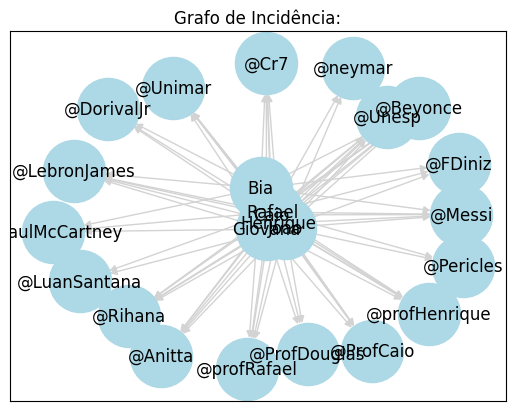

Matriz de Similaridade
          Rafael  Joao  Bia  Giovana  Caio  Henrique
Rafael        17    13    7       12     9        10
Joao          13    14    4        9     7         8
Bia            7     4    8        6     5         5
Giovana       12     9    6       13    10        11
Caio           9     7    5       10    10        10
Henrique      10     8    5       11    10        11


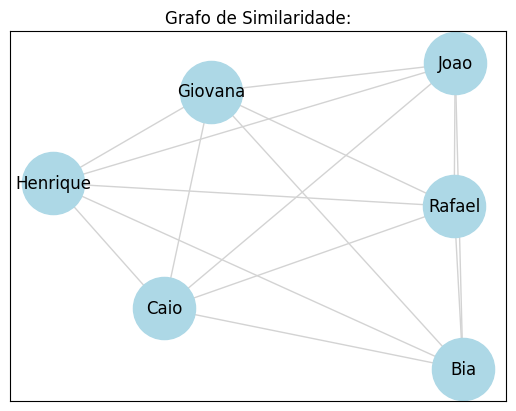

Matriz de Coocorrência
                @neymar  @LuanSantana  @Pericles  @ProfCaio  @ProfDouglas  \
@neymar               2             2          2          2             2   
@LuanSantana          2             2          2          2             2   
@Pericles             2             2          2          2             2   
@ProfCaio             2             2          2          4             3   
@ProfDouglas          2             2          2          3             3   
@profHenrique         2             2          2          4             3   
@Unimar               2             2          2          4             3   
@Unesp                2             2          2          4             3   
@Anitta               2             2          2          4             3   
@Rihana               2             2          2          4             3   
@Beyonce              2             2          2          4             3   
@DorivalJr            2             2          2     

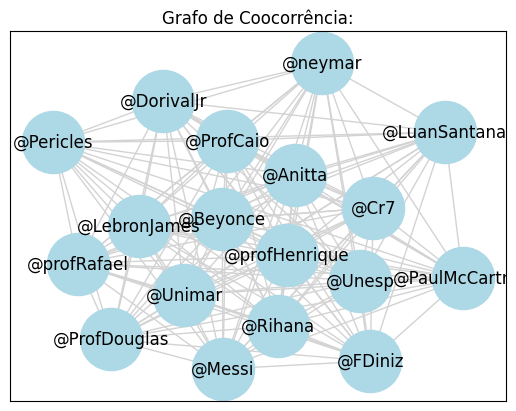

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Criando a matriz inicial
df = pd.read_csv('corpus.txt', delimiter='\t')

print("Matriz:")
print(df)

# Remover os 'perfis nulos'
perfis = pd.unique(df.values.ravel('K'))
perfis = [perfil for perfil in perfis if pd.notna(perfil)]
num_perfis = len(perfis)
num_pessoas = len(df.columns)

# Criando uma matriz vazia p/ incidência
incidencia = pd.DataFrame(0, index=perfis, columns=df.columns)
mtz_base = incidencia

# Preenchendo a matriz incidência
for pessoa in df.columns:
    for perfil in df[pessoa]:
        if pd.notna(perfil):
            incidencia.at[perfil, pessoa] = 1

print("Matriz de Incidência:")
print(incidencia)


# Criando grafo de incidencia
# Criar um grafo vazio
grf_inc = nx.DiGraph()

# Adicionando vertices para as pessoas e os perfis
grf_inc.add_nodes_from(df.columns, grupo_pessoas=0)  
grf_inc.add_nodes_from(perfis, grupo_perfis=1)    

# Adicionando arestas entre pessoas e seus perfis
for pessoa in df.columns:
    for perfil in df[pessoa]:
        if pd.notna(perfil):
            grf_inc.add_edge(pessoa, perfil)

# Desenhar o grafo bipartido de incidência
pos = nx.spring_layout(grf_inc)
nx.draw_networkx(grf_inc, pos, with_labels=True, node_color='lightblue', edge_color='lightgray', node_size=2000)
plt.title('Grafo de Incidência:')
plt.show()




#---------------------------------------------------------------------------------------------------


#Criando a matriz de similaridade
similaridade = np.dot(incidencia.T,incidencia)
mtz_similaridade = pd.DataFrame(data=similaridade, columns=df.columns, index=df.columns)
print("Matriz de Similaridade")
print(mtz_similaridade)

# Criando grafo de similaridade
# Criar um grafo vazio
grf_sim = nx.Graph()

# Adicionar arestas ao grafo com base na matriz de similaridade
for pessoa1 in range(len(mtz_similaridade.columns)):
    for pessoa2 in range(pessoa1+1, len(mtz_similaridade.columns)):
        if mtz_similaridade.iloc[pessoa1, pessoa2] > 0:
            grf_sim.add_edge(mtz_similaridade.columns[pessoa1], mtz_similaridade.columns[pessoa2], weight=mtz_similaridade.iloc[pessoa1, pessoa2])

# Desenhar o grafo
pos = nx.spring_layout(grf_sim)
nx.draw_networkx(grf_sim, pos, with_labels=True, node_color='lightblue', edge_color='lightgray', node_size=2000)
plt.title('Grafo de Similaridade:')
plt.show()


#---------------------------------------------------------------------------------------------------


#Criando a matriz de coocorrência
coocorrencia = np.dot(incidencia,incidencia.T)
mtz_coocorrencia = pd.DataFrame(data=coocorrencia, columns=perfis, index=perfis)
print("Matriz de Coocorrência")
print(mtz_coocorrencia)

# Criando grafo de coocorrência
# Criar um grafo vazio
grf_coo = nx.Graph()

# Adicionar arestas ao grafo com base na matriz de coocorrência
for perfil1 in range(len(mtz_coocorrencia.columns)):
    for perfil2 in range(perfil1+1, len(mtz_coocorrencia.columns)):
        if mtz_coocorrencia.iloc[perfil1, perfil2] > 0:
            grf_coo.add_edge(mtz_coocorrencia.columns[perfil1], mtz_coocorrencia.columns[perfil2], weight=mtz_coocorrencia.iloc[perfil1, perfil2])


# Desenhar o grafo
pos = nx.spring_layout(grf_coo)
nx.draw_networkx(grf_coo, pos, with_labels=True, node_color='lightblue', edge_color='lightgray', node_size=2000)
plt.title('Grafo de Coocorrência:')
plt.show()